In [1]:
from pathlib import Path
from typing import Tuple

import numpy as np
import numpy.typing as npt
import skimage.transform
import skimage.util
from tifffile import tifffile

from pybasic import compute_illum_profiles

working_size = 128
images_path = Path(r'images/Cell_culture/Uncorrected/DAPI')


def resize(a: npt.NDArray, shape: Tuple[int, ...]) -> npt.NDArray:
    return skimage.transform.resize(a, shape, order=1, mode='symmetric')


# read in images
images = [tifffile.imread(p) for p in images_path.iterdir()]
images = [resize(im, (working_size, working_size)) for im in images]
images = np.stack(images)
images = skimage.util.img_as_float(images)

In [2]:
compute_darkfields = [True, False]
sorts = [True, False]

computed = {}

for compute in compute_darkfields:
    for sort in sorts:
        computed[compute, sort] = compute_illum_profiles(images, compute_darkfield=compute, sort=sort)

/home/titanium/PycharmProjects/pybasic/src/pybasic/basic.py:116: RuntimeWarning: divide by zero encountered in scalar divide
  dark_mean = min(dark_mean, ims_min / flat_mean)


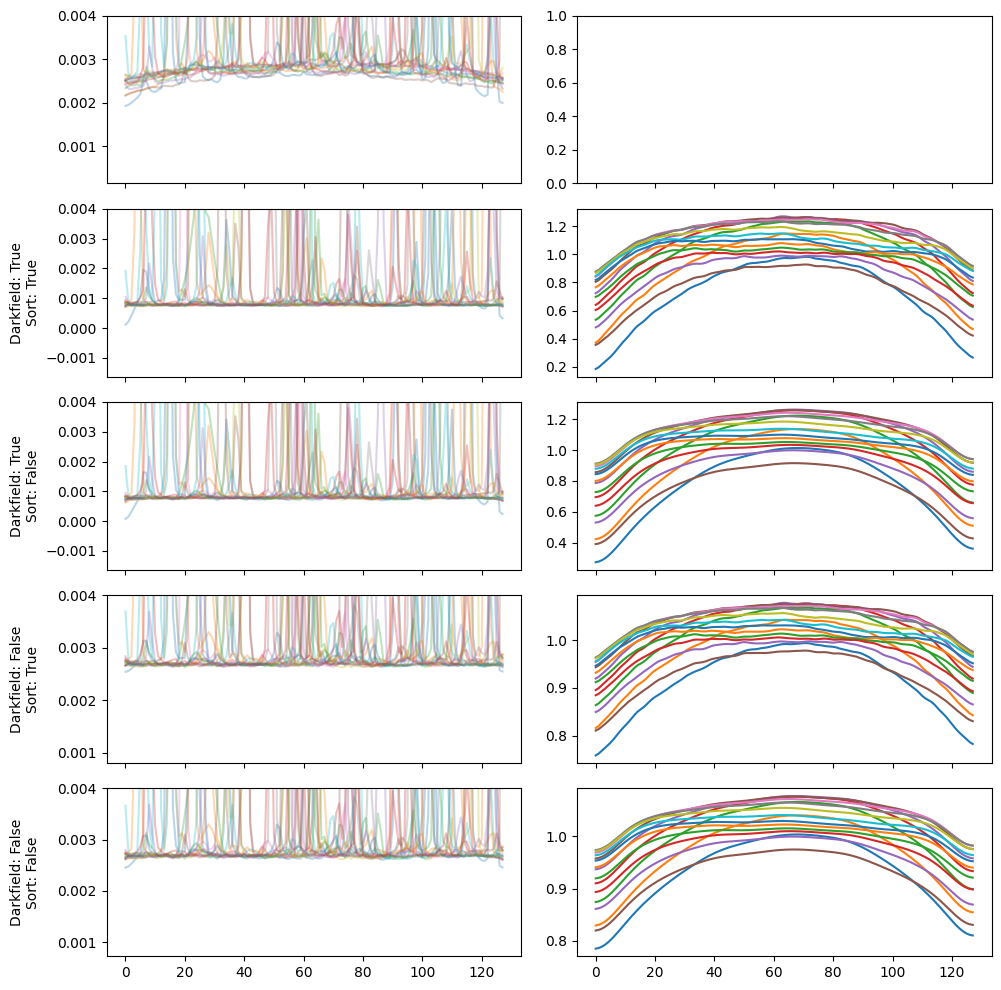

In [3]:
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from matplotlib import pyplot as plt

image = images[0]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 10), sharex=True)
fig: Figure
axes: npt.NDArray[Axes]

alpha = 0.3
ymax = 0.004
indexes = range(0, 128, 8)

ax_im: Axes = axes[0, 0]
for i in indexes:
    ax_im.plot(image[i, :], alpha=alpha)
ax_im.set_ylim(ax_im.get_ylim()[0], ymax)

yaxes_to_align = []

i = 1
for compute in compute_darkfields:
    for sort in sorts:
        ax_corr: Axes = axes[i, 0]
        ax_corr.yaxis.set_label_text(f'Darkfield: {compute}\nSort: {sort}')
        yaxes_to_align.append(ax_corr)

        flatfield, darkfield = computed[compute, sort]
        corrected = (image - darkfield) / flatfield

        for j in indexes:
            ax_corr.plot(corrected[j, :], alpha=alpha)

        ax_corr.set_ylim(ax_corr.get_ylim()[0], ymax)

        ax_flat: Axes = axes[i, 1]
        for j in indexes:
            ax_flat.plot(flatfield[j, :])

        i += 1

fig.align_ylabels(yaxes_to_align)

fig.tight_layout()